In [1]:
!pip install ipywidgets

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#%matplotlib widget # enable interactivity in your notebook
#%matplotlib inline # get back to normal modematplotlib.pyplot.title
#matplotlib.pyplot.title
#matplotlib.pyplot.xlabel and matplotlib.pyplot.ylabel
#matplotlib.pyplot.xticks & matplotlib.pyplot.yticks
#matplotlib.pyplot.xlim & matplotlib.pyplot.ylim
# matplotlib.pyplot.legend
#matplotlib.pyplot.grid
#
#
##
#

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
path="https://raw.githubusercontent.com/zilikons/demeter/master/data/berlin_with_features.json"
features=gpd.read_file(path)

In [6]:
features

,veg,roads,water,height_resid,height_nonresid,land_use_code,land_use_area,population,y,log_y,geometry
0,165,0,0,30,0,11220,95051.225653,90.136093,0.2,-1.609438,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
1,181,0,0,39,0,11220,26392.319278,90.136093,0.2,-1.609438,"POLYGON ((13.64686 52.34005, 13.64833 52.34000..."
2,195,0,0,35,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64547 52.34099, 13.64694 52.34094..."
3,204,0,0,29,0,11220,26392.319278,44.143646,3.0,1.098612,"POLYGON ((13.64694 52.34094, 13.64840 52.34090..."
4,102,0,0,27,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64555 52.34189, 13.64701 52.34184..."
...,...,...,...,...,...,...,...,...,...,...,...
71382,0,0,0,0,0,32000,13737.505410,0.000000,1.0,0.000000,"POLYGON ((13.47285 52.66910, 13.47433 52.66906..."
71383,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47292 52.67000, 13.47440 52.66995..."
71384,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47299 52.67089, 13.47447 52.67085..."
71385,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47306 52.67179, 13.47454 52.67175..."


In [7]:
features.duplicated().sum()

0

In [8]:
features.isnull().sum().sort_values(ascending=False) 

veg                0
roads              0
water              0
height_resid       0
height_nonresid    0
land_use_code      0
land_use_area      0
population         0
y                  0
log_y              0
geometry           0
dtype: int64

In [9]:
#not this
data_group=features.groupby(by="land_use_code").mean()
data_group=data_group.reset_index() #.drop(columns=["veg","roads", "water"])
data_group.head(2)

/var/folders/11/qmf8fycd0_d7cflbxhz7fnfw0000gn/T/ipykernel_83868/3482716940.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_group=features.groupby(by="land_use_code").mean()


,land_use_code,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y
0,11100,103.779304,6.062486,0.095723,143.147795,15.473299,25961.067313,79.709676,3.120097,-0.470655
1,11210,145.157455,2.915989,0.061475,121.023349,2.915620,36757.392852,72.010602,2.397857,-0.849769


In [ ]:
#Function 1
data_group_geometry=features.dissolve(by='land_use_code')
data_group_geometry=data_group_geometry.reset_index()

#### check function 1

In [10]:
from data_queries import dissolve_and_reset_index

In [11]:
data_group_geometry = dissolve_and_reset_index(features,'land_use_code')

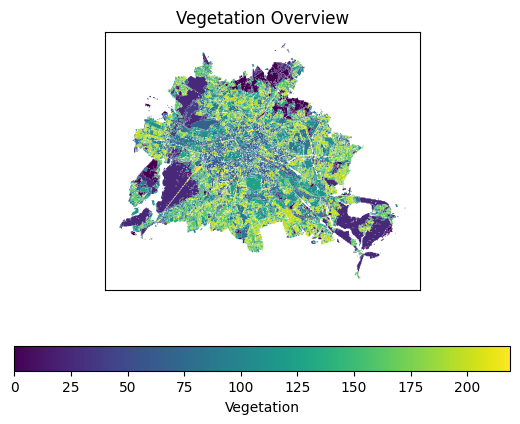

In [12]:
#function 2 instead of vegetation, we want any feature
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig, ax = plt.subplots(1, 1)
plt.title('Vegetation Overview')
plt.xticks([])
plt.yticks([])
data_group_geometry.plot(column="veg",
              ax=ax, 
              legend=True,
              legend_kwds={'label':'Vegetation' ,
                        'orientation':"horizontal"});

In [19]:
#testing function 2
from data_queries import plot_feature
plot_feature(features,)

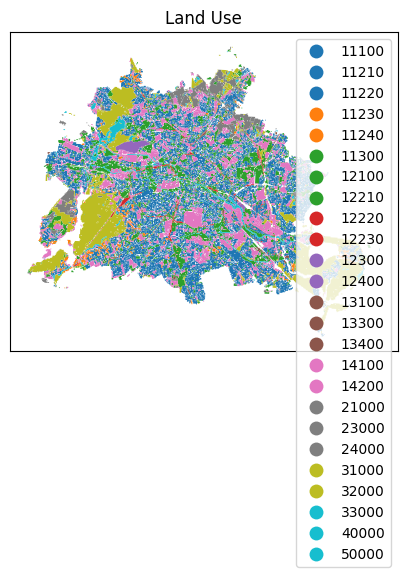

In [43]:
# same, so dont include
#fig, ax = plt.subplots(1, 1)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)
data_group_geometry.plot(column="land_use_code",figsize=(5,5), legend=True) 
plt.title('Land Use')
#plt.legend(loc="upper right")
plt.xticks([])
plt.yticks([])
plt.show();

In [ ]:
features["land_use_code"].unique()

In [ ]:
features.columns

In [50]:
features.head()

11100 Continuous Urban Fabric (S.L. &amp;gt; 80%)
11210 Discontinuous Dense Urban Fabric (S.L. : 50% - 80%)
11220 Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)
11230 Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)
11240 Discontinuous Very Low Density Urban Fabric (S.L. &amp;lt; 10%)
11300 Isolated Structures
12100 Industrial, commercial, public, military and private units
12210 Fast transit roads and associated land
12220 Other roads and associated land
12230 Railways and associated land
12300 Port areas
12400 Airports
13100 Mineral extraction and dump sites
13300 Construction sites
13400 Land without current use
14100 Green urban areas
14200 Sports and leisure facilities
21000 Arable land (annual crops)
22000 Permanent crops (vineyards, fruit trees, olive groves)
23000 Pastures
24000 Complex and mixed cultivation patterns
25000 Orchards at the fringe of urban classes
31000 Forests
32000 Herbaceous vegetation associations (natural grassland, moors...)
33000 Open spaces with little or no vegetations (beaches, dunes, bare rocks, glaciers)
40000 Wetland
50000 Water bodies

In [13]:
import matplotlib.pyplot as plt

def plot_scatter(data):
    data_sorted = data.sort_values(by=['y'])
    ax = data_sorted.plot(kind='scatter', x='land_use_code', y='y', xlabel='Land Use', ylabel='Biodiversity Occurrences')
    plt.title('Correlation')
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=35, horizontalalignment='right')
    plt.show()

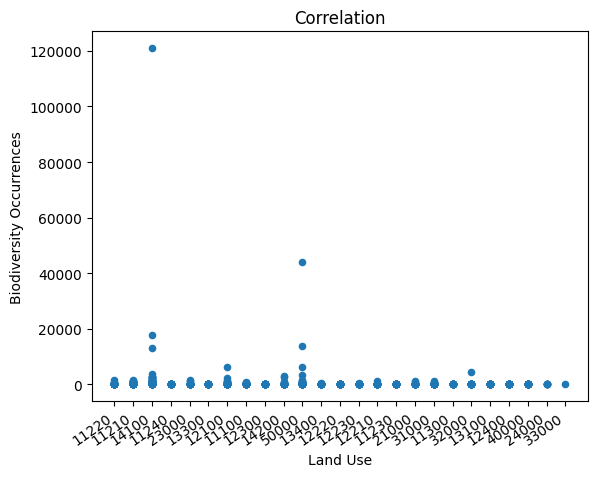

In [14]:
plot_scatter(features)

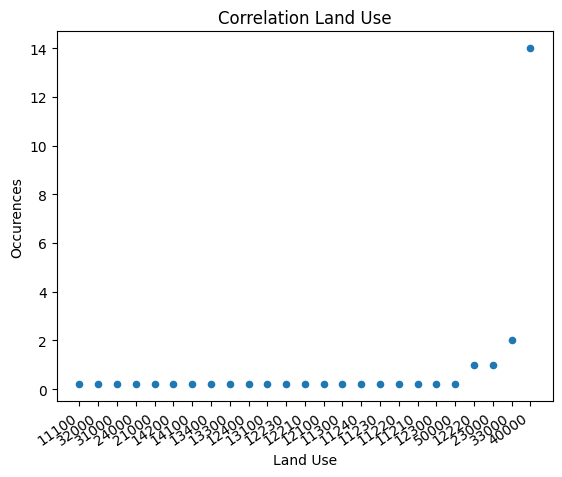

In [41]:
# Function 3 scatterplot between a feature and the target
data_sorted=data_group_geometry.sort_values(by=["y"])
ax=data_sorted.plot(kind="scatter", x="land_use_code", y="y", xlabel="Land Use", ylabel="Occurences")
plt.title('Correlation Land Use')
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=35, horizontalalignment='right')

In [ ]:
data_sorted=data_group.sort_values(by=["y"])

In [ ]:
ax=sns.scatterplot(data=data_sorted, x="land_use_code", y="y", hue="veg")
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=35, horizontalalignment='right')

In [ ]:
from params import URBAN_ATLAS_LAND_USE

In [22]:
features

,veg,roads,water,height_resid,height_nonresid,land_use_code,land_use_area,population,y,log_y,geometry
0,165,0,0,30,0,11220,95051.225653,90.136093,0.2,-1.609438,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
1,181,0,0,39,0,11220,26392.319278,90.136093,0.2,-1.609438,"POLYGON ((13.64686 52.34005, 13.64833 52.34000..."
2,195,0,0,35,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64547 52.34099, 13.64694 52.34094..."
3,204,0,0,29,0,11220,26392.319278,44.143646,3.0,1.098612,"POLYGON ((13.64694 52.34094, 13.64840 52.34090..."
4,102,0,0,27,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64555 52.34189, 13.64701 52.34184..."
...,...,...,...,...,...,...,...,...,...,...,...
71382,0,0,0,0,0,32000,13737.505410,0.000000,1.0,0.000000,"POLYGON ((13.47285 52.66910, 13.47433 52.66906..."
71383,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47292 52.67000, 13.47440 52.66995..."
71384,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47299 52.67089, 13.47447 52.67085..."
71385,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47306 52.67179, 13.47454 52.67175..."


In [38]:
features

,veg,roads,water,height_resid,height_nonresid,land_use_code,land_use_area,population,y,log_y,geometry
0,165,0,0,30,0,11220,95051.225653,90.136093,0.2,-1.609438,"POLYGON ((13.64540 52.34009, 13.64686 52.34005..."
1,181,0,0,39,0,11220,26392.319278,90.136093,0.2,-1.609438,"POLYGON ((13.64686 52.34005, 13.64833 52.34000..."
2,195,0,0,35,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64547 52.34099, 13.64694 52.34094..."
3,204,0,0,29,0,11220,26392.319278,44.143646,3.0,1.098612,"POLYGON ((13.64694 52.34094, 13.64840 52.34090..."
4,102,0,0,27,0,11220,95051.225653,44.143646,0.2,-1.609438,"POLYGON ((13.64555 52.34189, 13.64701 52.34184..."
...,...,...,...,...,...,...,...,...,...,...,...
71382,0,0,0,0,0,32000,13737.505410,0.000000,1.0,0.000000,"POLYGON ((13.47285 52.66910, 13.47433 52.66906..."
71383,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47292 52.67000, 13.47440 52.66995..."
71384,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47299 52.67089, 13.47447 52.67085..."
71385,0,0,0,0,0,23000,25948.699349,0.000000,0.2,-1.609438,"POLYGON ((13.47306 52.67179, 13.47454 52.67175..."


In [52]:
URBAN_ATLAS_LAND_USE

{11100: 'Continuous Urban Fabric (S.L. > 80%)',
 11210: 'Discontinuous Dense Urban Fabric (S.L. : 50% - 80%)',
 11220: 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
 11230: 'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)',
 11240: 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
 11300: 'Isolated Structures',
 12100: 'Industrial, commercial, public, military and private units',
 12210: 'Fast transit roads and associated land',
 12220: 'Other roads and associated land',
 12230: 'Railways and associated land',
 12300: 'Port areas',
 12400: 'Airports',
 13100: 'Mineral extraction and dump sites',
 13300: 'Construction sites',
 13400: 'Land without current use',
 14100: 'Green urban areas',
 14200: 'Sports and leisure facilities',
 21000: 'Arable land (annual crops)',
 22000: 'Permanent crops (vineyards, fruit trees, olive groves)',
 23000: 'Pastures',
 24000: 'Complex and mixed cultivation patterns',
 25000: 'Orchards at the fringe of urban classes'

In [64]:
def plot_scatter(data, land_use_code_int):
    land_use_name = URBAN_ATLAS_LAND_USE[land_use_code_int]
    data_subset = data[data['land_use_code'] == str(land_use_code_int)]
    data_sorted = data_subset.sort_values(by=['y'])
    ax = data_sorted.plot(kind='scatter', x='land_use_code', y='y', xlabel=land_use_name, ylabel='Occurrences')
    plt.title(f'Correlation with {land_use_name}')
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=35, horizontalalignment='right')
    plt.show()

Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)
       veg  roads  water  height_resid  height_nonresid land_use_code  \
0      165      0      0            30                0         11220   
1      181      0      0            39                0         11220   
2      195      0      0            35                0         11220   
3      204      0      0            29                0         11220   
4      102      0      0            27                0         11220   
...    ...    ...    ...           ...              ...           ...   
71309  138      0      0            74                0         11220   
71310  168      0      0            62                0         11220   
71321  150      0      0            64                0         11220   
71323  183      0      0            72                0         11220   
71324   93      0      0            44                0         11220   

       land_use_area  population    y     log_y  \
0       950

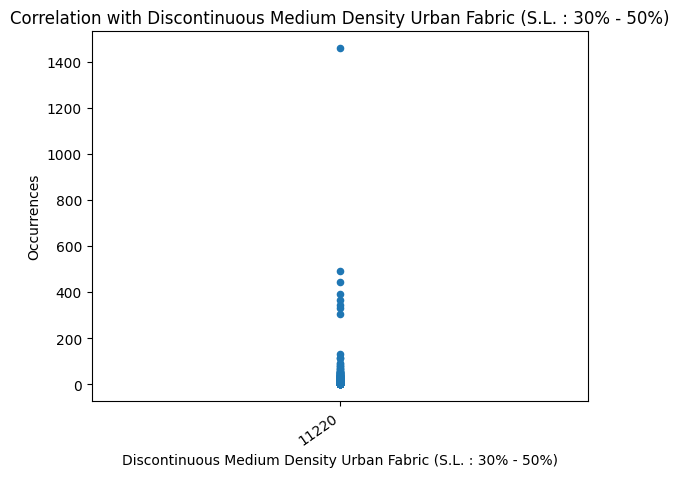

In [62]:
plot_scatter(features,11220)

In [35]:
def plot_scatter_by_name(data, land_use_name):
    land_use_code_int = [key for key, value in URBAN_ATLAS_LAND_USE.items() if value == land_use_name][0]
    data_subset = data[data['land_use_code'] == land_use_code_int]
    data_sorted = data_subset.sort_values(by=['y'])
    fig, ax = plt.subplots()
    ax.scatter(x=data_sorted['land_use_code'], y=data_sorted['y'])
    ax.set(xlabel=land_use_name, ylabel='Occurrences')
    ax.set_title(f'Correlation Land Use ({land_use_name})')
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=35, horizontalalignment='right')
    plt.show()

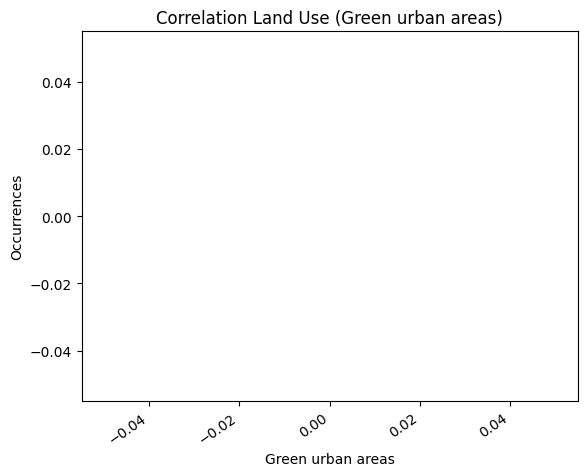

In [37]:
plot_scatter_by_name(features,'Green urban areas')

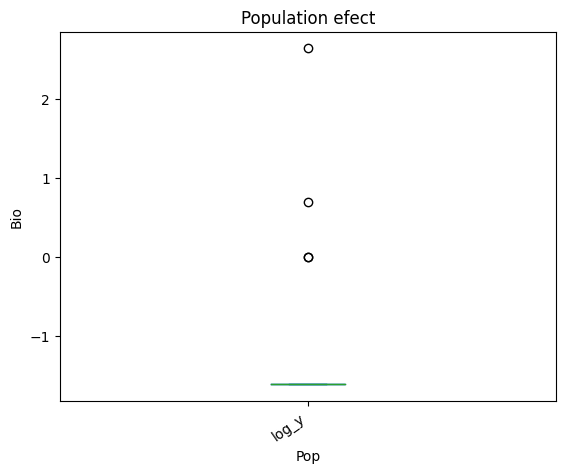

In [16]:
# same but useless - not include 
ax=data_group_geometry.plot(kind="box", x="population", y="log_y", xlabel="Pop", ylabel="Bio")
plt.title('Population efect')
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=35, horizontalalignment='right')

In [18]:
# skip this one
corr=features.corr()
corr.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_651/1957353180.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=features.corr()


,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y
veg,1.000000,-0.078782,-0.002648,0.473949,-0.121269,-0.368446,0.454003,0.010895,0.112960
roads,-0.078782,1.000000,-0.000546,0.093799,0.037169,-0.092615,0.089515,-0.002180,0.012609
water,-0.002648,-0.000546,1.000000,-0.045654,-0.001389,-0.023648,-0.035387,0.019412,0.070612
height_resid,0.473949,0.093799,-0.045654,1.000000,-0.073102,-0.393871,0.715456,-0.009027,-0.004113
height_nonresid,-0.121269,0.037169,-0.001389,-0.073102,1.000000,-0.092721,-0.013353,-0.002496,-0.058498
land_use_area,-0.368446,-0.092615,-0.023648,-0.393871,-0.092721,1.000000,-0.364900,-0.002852,-0.081895
population,0.454003,0.089515,-0.035387,0.715456,-0.013353,-0.364900,1.000000,-0.000731,-0.012366
y,0.010895,-0.002180,0.019412,-0.009027,-0.002496,-0.002852,-0.000731,1.000000,0.081323
log_y,0.112960,0.012609,0.070612,-0.004113,-0.058498,-0.081895,-0.012366,0.081323,1.000000


In [19]:
# Function 4 any feature correlation - instead of veg
corr_group=data_group_geometry.corr()[["veg"]]
corr_group.style.background_gradient(cmap='coolwarm')


/tmp/ipykernel_651/933326144.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_group=data_group_geometry.corr()


,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y
veg,1.000000,-0.130663,0.150774,0.797699,0.039364,-0.016649,0.421197,-0.275488,-0.334332
roads,-0.130663,1.000000,-0.050795,-0.115264,-0.075944,-0.047019,0.100206,-0.051889,-0.080231
water,0.150774,-0.050795,1.000000,0.277153,-0.017434,0.033095,0.092526,-0.003076,0.231764
height_resid,0.797699,-0.115264,0.277153,1.000000,0.106492,0.362722,0.478307,-0.242027,-0.255006
height_nonresid,0.039364,-0.075944,-0.017434,0.106492,1.000000,-0.092806,0.148191,-0.094576,-0.146233
land_use_area,-0.016649,-0.047019,0.033095,0.362722,-0.092806,1.000000,-0.001005,-0.053267,-0.049525
population,0.421197,0.100206,0.092526,0.478307,0.148191,-0.001005,1.000000,-0.247196,-0.221009
y,-0.275488,-0.051889,-0.003076,-0.242027,-0.094576,-0.053267,-0.247196,1.000000,0.871468
log_y,-0.334332,-0.080231,0.231764,-0.255006,-0.146233,-0.049525,-0.221009,0.871468,1.000000


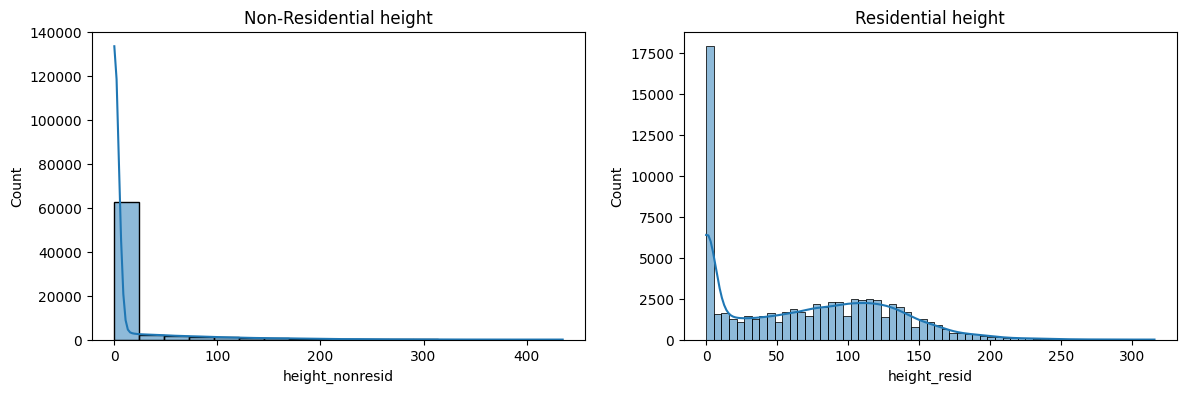

In [20]:
# Function 6 Histogram - but we put it next to plotting of the feature (i.e. first function - make this second)
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.title('Non-Residential height')
sns.histplot(features['height_nonresid'], kde=True);

plt.subplot(1, 2, 2)
plt.title('Residential height')
sns.histplot(features['height_resid'], kde=True);




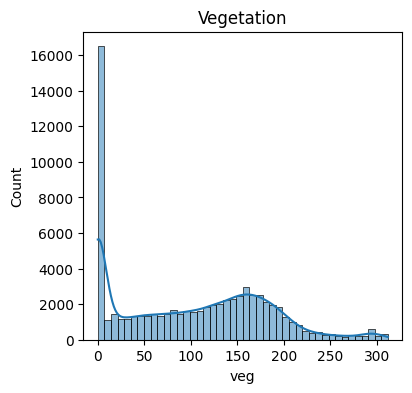

In [21]:
# not include 
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
plt.title('Vegetation')
sns.histplot(features['veg'], kde=True);



In [22]:
# skip this 
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(data_group_geometry[["land_use_code"]])
display(ordinal_encoder.categories_)


[array(['11100', '11210', '11220', '11230', '11240', '11300', '12100',
        '12210', '12220', '12230', '12300', '12400', '13100', '13300',
        '13400', '14100', '14200', '21000', '23000', '24000', '31000',
        '32000', '33000', '40000', '50000'], dtype=object)]

In [23]:
# skip this
data_group_geometry["encoded_land_use"] = ordinal_encoder.transform(data_group_geometry[["land_use_code"]])
data_group_geometry_ordinal=data_group_geometry
data_group_geometry_ordinal.head(2)

,land_use_code,geometry,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y,encoded_land_use
0,11100,"MULTIPOLYGON (((13.22688 52.42325, 13.22695 52...",63,0,0,45,174,5065.503377,91.828110,0.2,-1.609438,0.0
1,11210,"MULTIPOLYGON (((13.13620 52.41039, 13.13767 52...",198,0,0,96,0,11572.289326,106.035767,0.2,-1.609438,1.0


In [24]:
#skip it
corr_group_enc_one=data_group_geometry_ordinal.corr(method="pearson", min_periods=1)
corr_group_enc_one.style.background_gradient(cmap='coolwarm')


/tmp/ipykernel_651/1512366557.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_group_enc_one=data_group_geometry_ordinal.corr(method="pearson", min_periods=1)


,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y,encoded_land_use
veg,1.000000,-0.130663,0.150774,0.797699,0.039364,-0.016649,0.421197,-0.275488,-0.334332,-0.433913
roads,-0.130663,1.000000,-0.050795,-0.115264,-0.075944,-0.047019,0.100206,-0.051889,-0.080231,-0.141535
water,0.150774,-0.050795,1.000000,0.277153,-0.017434,0.033095,0.092526,-0.003076,0.231764,-0.144309
height_resid,0.797699,-0.115264,0.277153,1.000000,0.106492,0.362722,0.478307,-0.242027,-0.255006,-0.334654
height_nonresid,0.039364,-0.075944,-0.017434,0.106492,1.000000,-0.092806,0.148191,-0.094576,-0.146233,-0.267549
land_use_area,-0.016649,-0.047019,0.033095,0.362722,-0.092806,1.000000,-0.001005,-0.053267,-0.049525,-0.029534
population,0.421197,0.100206,0.092526,0.478307,0.148191,-0.001005,1.000000,-0.247196,-0.221009,-0.504271
y,-0.275488,-0.051889,-0.003076,-0.242027,-0.094576,-0.053267,-0.247196,1.000000,0.871468,0.351288
log_y,-0.334332,-0.080231,0.231764,-0.255006,-0.146233,-0.049525,-0.221009,0.871468,1.000000,0.407145
encoded_land_use,-0.433913,-0.141535,-0.144309,-0.334654,-0.267549,-0.029534,-0.504271,0.351288,0.407145,1.000000


In [25]:
#skip
corr_group_enc_one_s=data_group_geometry_ordinal.corr(method="spearman", min_periods=1)
corr_group_enc_one_s.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_651/3359424212.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_group_enc_one_s=data_group_geometry_ordinal.corr(method="spearman", min_periods=1)


,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y,encoded_land_use
veg,1.000000,-0.113666,0.129311,0.866227,0.187456,0.204635,0.348937,-0.321245,-0.321245,-0.450969
roads,-0.113666,1.000000,-0.075241,-0.113710,-0.088666,0.056614,0.141808,-0.088708,-0.088708,-0.141535
water,0.129311,-0.075241,1.000000,0.172482,0.172921,0.136992,-0.002049,0.171400,0.171400,-0.237180
height_resid,0.866227,-0.113710,0.172482,1.000000,0.310329,0.262266,0.439243,-0.307450,-0.307450,-0.450371
height_nonresid,0.187456,-0.088666,0.172921,0.310329,1.000000,-0.118064,-0.001207,-0.188768,-0.188768,-0.140954
land_use_area,0.204635,0.056614,0.136992,0.262266,-0.118064,1.000000,0.097881,0.164524,0.164524,0.050000
population,0.348937,0.141808,-0.002049,0.439243,-0.001207,0.097881,1.000000,-0.119857,-0.119857,-0.427746
y,-0.321245,-0.088708,0.171400,-0.307450,-0.188768,0.164524,-0.119857,1.000000,1.000000,0.370027
log_y,-0.321245,-0.088708,0.171400,-0.307450,-0.188768,0.164524,-0.119857,1.000000,1.000000,0.370027
encoded_land_use,-0.450969,-0.141535,-0.237180,-0.450371,-0.140954,0.050000,-0.427746,0.370027,0.370027,1.000000


In [26]:
#skip
corr_group_enc_ord_k=data_group_geometry_ordinal.corr(method="kendall", min_periods=1)
corr_group_enc_ord_k.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_651/4292359954.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_group_enc_ord_k=data_group_geometry_ordinal.corr(method="kendall", min_periods=1)


,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y,encoded_land_use
veg,1.000000,-0.095893,0.113937,0.726648,0.136177,0.135613,0.250006,-0.261430,-0.261430,-0.284787
roads,-0.095893,1.000000,-0.074261,-0.096225,-0.086066,0.047140,0.119048,-0.086548,-0.086548,-0.117851
water,0.113937,-0.074261,1.000000,0.150061,0.166176,0.112022,0.000000,0.167107,0.167107,-0.196039
height_resid,0.726648,-0.096225,0.150061,1.000000,0.254663,0.197320,0.312731,-0.249844,-0.249844,-0.306186
height_nonresid,0.136177,-0.086066,0.166176,0.254663,1.000000,-0.097373,0.000000,-0.178774,-0.178774,-0.121716
land_use_area,0.135613,0.047140,0.112022,0.197320,-0.097373,1.000000,0.080812,0.140758,0.140758,0.033333
population,0.250006,0.119048,0.000000,0.312731,0.000000,0.080812,1.000000,-0.098913,-0.098913,-0.323249
y,-0.261430,-0.086548,0.167107,-0.249844,-0.178774,0.140758,-0.098913,1.000000,1.000000,0.312115
log_y,-0.261430,-0.086548,0.167107,-0.249844,-0.178774,0.140758,-0.098913,1.000000,1.000000,0.312115
encoded_land_use,-0.284787,-0.117851,-0.196039,-0.306186,-0.121716,0.033333,-0.323249,0.312115,0.312115,1.000000


In [27]:
# Fucntion 7: function in the background
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
ohe.fit(data_group_geometry[["land_use_code"]]) 

# Display the detected categories
print(f"The categories detected by the OneHotEncoder are {ohe.categories_}")

The categories detected by the OneHotEncoder are [array(['11100', '11210', '11220', '11230', '11240', '11300', '12100',
       '12210', '12220', '12230', '12300', '12400', '13100', '13300',
       '13400', '14100', '14200', '21000', '23000', '24000', '31000',
       '32000', '33000', '40000', '50000'], dtype=object)]


/home/ana/.pyenv/versions/3.10.6/envs/demeter/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
#include in function 7
data_group_geometry[ohe.get_feature_names_out()] = ohe.transform(data_group_geometry[["land_use_code"]])
data_group_geometry_hot=data_group_geometry
data_group_geometry_hot.head(2)

,land_use_code,geometry,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,...,land_use_code_14100,land_use_code_14200,land_use_code_21000,land_use_code_23000,land_use_code_24000,land_use_code_31000,land_use_code_32000,land_use_code_33000,land_use_code_40000,land_use_code_50000
0,11100,"MULTIPOLYGON (((13.22688 52.42325, 13.22695 52...",63,0,0,45,174,5065.503377,91.828110,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11210,"MULTIPOLYGON (((13.13620 52.41039, 13.13767 52...",198,0,0,96,0,11572.289326,106.035767,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# for any feature we do the ohe, we choose the spearman method - maybe find another style 
corr_group_enc_hot_s=data_group_geometry_hot.corr(method="spearman", min_periods=1)
corr_group_enc_hot_s.style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_651/1803735768.py:1: FutureWarning: The default value of numeric_only in GeoDataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_group_enc_hot_s=data_group_geometry_hot.corr(method="spearman", min_periods=1)


,veg,roads,water,height_resid,height_nonresid,land_use_area,population,y,log_y,encoded_land_use,land_use_code_11100,land_use_code_11210,land_use_code_11220,land_use_code_11230,land_use_code_11240,land_use_code_11300,land_use_code_12100,land_use_code_12210,land_use_code_12220,land_use_code_12230,land_use_code_12300,land_use_code_12400,land_use_code_13100,land_use_code_13300,land_use_code_13400,land_use_code_14100,land_use_code_14200,land_use_code_21000,land_use_code_23000,land_use_code_24000,land_use_code_31000,land_use_code_32000,land_use_code_33000,land_use_code_40000,land_use_code_50000
veg,1.000000,-0.113666,0.129311,0.866227,0.187456,0.204635,0.348937,-0.321245,-0.321245,-0.450969,-0.056833,0.312581,0.255748,0.085249,-0.028416,-0.170499,0.056833,-0.113666,0.198915,0.340997,0.028416,0.000000,0.142082,0.227331,-0.284164,0.113666,0.170499,-0.284164,-0.284164,0.284164,-0.142082,-0.284164,-0.198915,-0.284164,-0.085249
roads,-0.113666,1.000000,-0.075241,-0.113710,-0.088666,0.056614,0.141808,-0.088708,-0.088708,-0.141535,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,1.000000,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667,-0.041667
water,0.129311,-0.075241,1.000000,0.172482,0.172921,0.136992,-0.002049,0.171400,0.171400,-0.237180,-0.075241,-0.075241,-0.075241,-0.075241,0.526688,-0.075241,-0.075241,-0.075241,0.601929,-0.075241,0.526688,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241,-0.075241
height_resid,0.866227,-0.113710,0.172482,1.000000,0.310329,0.262266,0.439243,-0.307450,-0.307450,-0.450371,0.127924,0.298488,0.000000,0.170565,-0.085282,-0.170565,-0.028427,-0.113710,0.227420,0.198992,0.127924,0.298488,0.085282,0.341129,-0.284275,0.056855,0.028427,-0.284275,-0.284275,0.255847,-0.142137,-0.284275,-0.198992,-0.284275,-0.056855
height_nonresid,0.187456,-0.088666,0.172921,0.310329,1.000000,-0.118064,-0.001207,-0.188768,-0.188768,-0.140954,0.531995,-0.088666,-0.088666,-0.088666,-0.088666,-0.088666,-0.088666,-0.088666,-0.088666,-0.088666,0.487662,-0.088666,0.443329,-0.088666,-0.088666,-0.088666,-0.088666,-0.088666,-0.088666,0.398996,-0.088666,-0.088666,-0.088666,-0.088666,-0.088666
land_use_area,0.204635,0.056614,0.136992,0.262266,-0.118064,1.000000,0.097881,0.164524,0.164524,0.050000,-0.283069,-0.169842,0.226455,0.113228,-0.141535,-0.339683,-0.084921,0.056614,0.311376,0.084921,0.028307,0.339683,-0.113228,0.254762,-0.254762,-0.226455,-0.056614,0.169842,0.283069,0.198148,0.000000,0.141535,-0.198148,-0.028307,-0.311376
population,0.348937,0.141808,-0.002049,0.439243,-0.001207,0.097881,1.000000,-0.119857,-0.119857,-0.427746,0.311977,0.340338,0.283615,0.226892,-0.141808,-0.297796,-0.297796,0.141808,0.198531,0.056723,-0.085085,0.000000,-0.170169,0.255254,0.113446,0.028362,-0.226892,0.170169,-0.297796,-0.113446,-0.056723,-0.297796,0.085085,-0.198531,-0.028362
y,-0.321245,-0.088708,0.171400,-0.307450,-0.188768,0.164524,-0.119857,1.000000,1.000000,0.370027,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,0.421362,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,0.421362,-0.088708,-0.088708,-0.088708,0.487892,0.532246,-0.088708
log_y,-0.321245,-0.088708,0.171400,-0.307450,-0.188768,0.164524,-0.119857,1.000000,1.000000,0.370027,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,0.421362,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,-0.088708,0.421362,-0.088708,-0.088708,-0.088708,0.487892,0.532246,-0.088708
encoded_land_use,-0.450969,-0.141535,-0.237180,-0.450371,-0.140954,0.050000,-0.427746,0.370027,0.370027,1.000000,-0.339683,-0.311376,-0.283069,-0.254762,-0.226455,-0.198148,-0.169842,-0.141535,-0.113228,-0.084921,-0.056614,-0.028307,0.000000,0.028307,0.056614,0.084921,0.113228,0.141535,0.16984

In [30]:
# include this in the function -0.08 and +0.08 in an if statement
final_corr=corr_group_enc_hot_s[["y","log_y"]]
d=["roads","y","log_y",
   "land_use_code_11100","land_use_code_11210","land_use_code_11220","land_use_code_11230","land_use_code_11240","land_use_code_11300","land_use_code_12100","land_use_code_12210",
   "land_use_code_12230","land_use_code_12300","land_use_code_12400","land_use_code_13100","land_use_code_13300","land_use_code_13400","land_use_code_14100",
   "land_use_code_14200","land_use_code_21000","land_use_code_24000","land_use_code_31000","land_use_code_32000","land_use_code_50000"]
final_corr=final_corr.drop(d, axis=0)
final_corr.style.background_gradient(cmap='coolwarm')


,y,log_y
veg,-0.321245,-0.321245
water,0.171400,0.171400
height_resid,-0.307450,-0.307450
height_nonresid,-0.188768,-0.188768
land_use_area,0.164524,0.164524
population,-0.119857,-0.119857
encoded_land_use,0.370027,0.370027
land_use_code_12220,0.421362,0.421362
land_use_code_23000,0.421362,0.421362
land_use_code_33000,0.487892,0.487892
